Scipy:
We have the min and max temperatures in a city In India for each months of the year.

We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
%matplotlib inline

Text(0, 0.5, 'Min and max temperature')

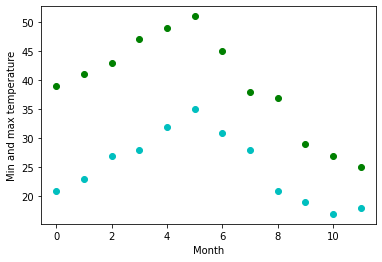

In [2]:

import numpy as np

t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, t_max, 'go')
plt.plot(months, t_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Fitting it to a periodic function

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      t_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      t_min, [-40, 20, 0])

In [6]:
print(res_max)
print(res_min)

[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.89899664  1.60673368]


Plot

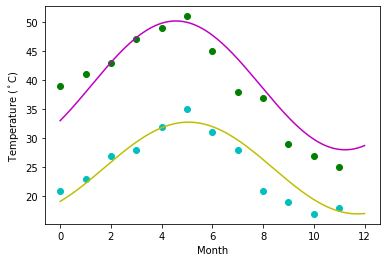

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, t_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, t_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib:

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [11]:
import pandas as pd
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)


In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
a=titanic['sex'].value_counts()
a

male      843
female    466
Name: sex, dtype: int64

In [18]:
#out of total
b=titanic['sex'].count()
b

1309

In [29]:
total=  round((titanic['sex'].value_counts()/len(titanic))*100,2)
total
total_data=pd.DataFrame(total)
total_data

,sex
male,64.35
female,35.57


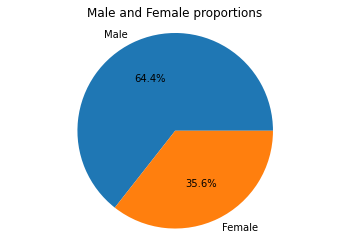

In [30]:
Proportions = [64.35,35.57]
my_labels = 'Male','Female'

plt.pie(Proportions,labels=my_labels,autopct='%1.1f%%')

plt.title('Male and Female proportions')
plt.axis('equal')
plt.show()

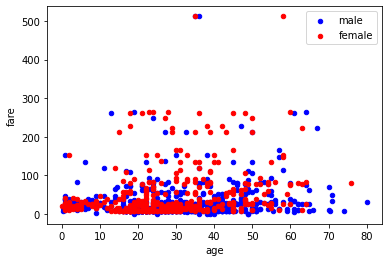

In [37]:
data= titanic[titanic.sex=='male'].plot.scatter('age','fare',color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age','fare',color='red',label='female',ax=data)
